In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import statsmodels.tsa.api as smt
from datetime import datetime

In [2]:
df = pd.read_excel("../../Datasets/Cosmexp/Cosmexp.xlsx")

In [3]:
df.dropna(subset=["Sale Date","Quantity","Price","Discount Amount"],inplace=True)

In [4]:
df = pd.DataFrame(df[["Sale Date","Quantity","Price","Discount Amount"]])

In [5]:
df.head(5)

,Sale Date,Quantity,Price,Discount Amount
0,12/31/19,1.0,5000.0,500.0
1,12/31/19,1.0,4990.0,499.0
2,12/31/19,1.0,5990.0,1498.0
3,12/31/19,1.0,4990.0,499.0
4,12/31/19,1.0,4990.0,499.0


In [6]:
df["Price"] = (df["Price"] -df["Discount Amount"])/ 100

In [7]:
def map_seasons(dataframe,month,season,sale_date):
    dataframe[season] = ""  # Add a new column named "Season" to the dataframe
    for i in dataframe[sale_date]:
        nums = str.split(i,sep="/")
        date = ""
        if nums[0] in ["12","01","02"]:
            date = "Winter"
        elif nums[0] in ["03","04","05"]:
            date = "Spring"
        elif nums[0] in ["06","07","08"]:
            date = "Summer"
        elif nums[0] in ["09","10","11"]:
            date = "Fall"
        dataframe.loc[dataframe[sale_date] == i, month] = nums[0]
    return dataframe   

In [8]:
df = map_seasons(df,"Month","Season","Sale Date")

In [9]:
def map_years(dataframe, years,sale_date):
    dataframe[years] = ""
    for i in dataframe[sale_date]:
        date = datetime.strptime(i, "%m/%d/%y")
        year = date.year
        dataframe.loc[dataframe[sale_date] == i, years] = year
    return dataframe

In [10]:
df = map_years(df,"Year","Sale Date")

In [11]:
df

,Sale Date,Quantity,Price,Discount Amount,Season,Month,Year
0,12/31/19,1.0,45.00,500.0,,12,2019
1,12/31/19,1.0,44.91,499.0,,12,2019
2,12/31/19,1.0,44.92,1498.0,,12,2019
3,12/31/19,1.0,44.91,499.0,,12,2019
4,12/31/19,1.0,44.91,499.0,,12,2019
...,...,...,...,...,...,...,...
3668,01/01/20,1.0,49.90,0.0,,01,2020
3669,01/01/20,1.0,49.90,0.0,,01,2020
3670,01/01/20,1.0,49.50,550.0,,01,2020
3671,01/01/20,1.0,54.00,600.0,,01,2020


In [12]:
# create a new column 'Date' based on 'Month' and 'Year'
df['Sale Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')

In [13]:
df = df.rename(columns={'Sale Date': 'date'})

In [14]:
df

,date,Quantity,Price,Discount Amount,Season,Month,Year
0,2019-12-01,1.0,45.00,500.0,,12,2019
1,2019-12-01,1.0,44.91,499.0,,12,2019
2,2019-12-01,1.0,44.92,1498.0,,12,2019
3,2019-12-01,1.0,44.91,499.0,,12,2019
4,2019-12-01,1.0,44.91,499.0,,12,2019
...,...,...,...,...,...,...,...
3668,2020-01-01,1.0,49.90,0.0,,01,2020
3669,2020-01-01,1.0,49.90,0.0,,01,2020
3670,2020-01-01,1.0,49.50,550.0,,01,2020
3671,2020-01-01,1.0,54.00,600.0,,01,2020


In [15]:
df['Total Profits'] = df['Quantity'] * df['Price']

In [16]:
df.to_csv('../../Datasets/Bouletta/train.csv')

In [17]:
def monthly_sales(data):
    monthly_data = data.copy()
    monthly_data = monthly_data.groupby('date')['Total Profits'].sum().reset_index()
    print(monthly_data.shape)
    monthly_data.date = pd.to_datetime(monthly_data.date)
    return monthly_data

In [18]:
monthly_df = monthly_sales(df)
monthly_df

(21, 2)


,date,Total Profits
0,2019-01-01,1784.49
1,2019-02-01,1661.71
2,2019-03-01,1520.22
3,2019-04-01,1140.89
4,2019-05-01,2650.14
5,2019-06-01,2603.02
6,2019-07-01,2990.11
7,2019-08-01,3834.81
8,2019-09-01,4352.32
9,2019-10-01,6059.99


In [19]:
df.shape

(3669, 8)

In [20]:
monthly_df.shape

(21, 2)

In [21]:
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x_col, y_col, data=data, ax=ax, color='mediumblue', label='Total Sales')
    second = data.groupby(data.date.dt.year)[y_col].mean().reset_index()
    second.date = pd.to_datetime(second.date, format='%Y')
    sns.lineplot((second.date + datetime.timedelta(6*365/12)), y_col, data=second, ax=ax, color='red',\
                 label='Mean Sales')   
    ax.set(xlabel = "date",ylabel = "Total Profits",title = title)
    sns.despine()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: type object 'datetime.datetime' has no attribute 'timedelta'

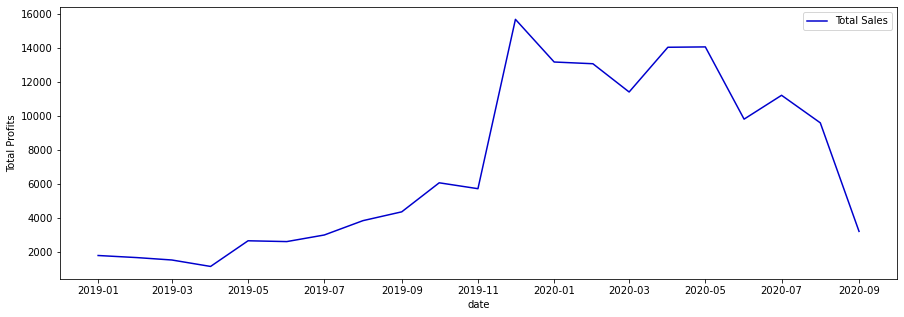

In [22]:
time_plot(monthly_df, 'date', 'Total Profits', 'Monthly Sales Before Diff Transformation')

In [ ]:
def get_diff(data):
    data['sales_diff'] = data["Total Profits"].diff()
    data = data.dropna()
    data.to_csv('../../Datasets/Bouletta/stationary_df.csv')
    return data

In [ ]:
stationary_df = get_diff(monthly_df)

In [ ]:
stationary_df

In [ ]:
time_plot(stationary_df, 'date', 'sales_diff', 'Monthly Sales After Diff Transformation')

In [ ]:
def plots(data, lags=None):
    
    # Convert dataframe to datetime index
    dt_data = data.set_index('date').drop('Total Profits', axis=1)
    dt_data.dropna(axis=0)
    
    layout = (1, 2)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
#     pacf = plt.subplot2grid(layout, (0, 2))
    
    dt_data.plot(ax=raw, figsize=(12, 5), color='mediumblue')
    smt.graphics.plot_acf(dt_data, lags=lags, ax=acf, color='mediumblue')
#     smt.graphics.plot_pacf(dt_data, lags=lags, ax=pacf, color='mediumblue')
    sns.despine()
    plt.tight_layout()

plots(stationary_df, lags=24);

***Regressive Modeling***

In [ ]:
#create dataframe for transformation from time series to supervised
def generate_supervised(data):
    supervised_df = data.copy()
    
    #create column for each lag
    for i in range(1,13):
        col_name = 'lag_' + str(i)
        supervised_df[col_name] = supervised_df['sales_diff'].shift(i)
    
    #drop null values
    supervised_df = supervised_df.dropna().reset_index(drop=True)
    
    supervised_df.to_csv('../../Datasets/Bouletta/model_df.csv', index=False)
    
    return supervised_df

In [ ]:
model_df = generate_supervised(stationary_df)

In [ ]:
model_df

***ARIMA Modeling***

In [ ]:
def generate_arima_data(data):
    dt_data = data.set_index('date').drop('Total Profits', axis=1)
    dt_data.dropna(axis=0)
    
    dt_data.to_csv('../../Datasets/Bouletta/arima_df.csv')
    
    return dt_data

In [ ]:
datetime_df = generate_arima_data(stationary_df)

In [ ]:
datetime_df